In [36]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit import DataStructs
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG=True
import numpy as np
from rdkit import rdBase

In [37]:
rdBase.rdkitVersion

'2022.03.3'

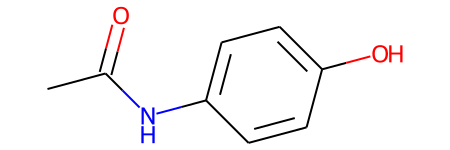

In [38]:
# to visualize chemical structure (paracetamol) from smiles notaion
paracetamol = Chem.MolFromSmiles('CC(=O)NC1=CC=C(C=C1)O')
paracetamol

In [39]:
#Saving chemical structure to image
Draw.MolToFile(paracetamol, "paracetamol.png")

In [40]:
# Opening sdf files
x = Chem.SDMolSupplier ('aspirin.sdf')

In [41]:
x    # contains rdkit object but needs initialization before useage

In [42]:
x1 = Chem.MolFromMolFile ('aspirin.mol')

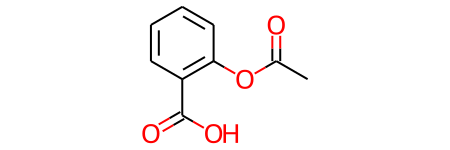

In [43]:
x1

In [44]:
x2 = Chem.MolFromInchi ('InChI=1S/C20H17F2N3O3/c21-12-1-3-13(4-2-12)25-11-15(20(27)28)19(26)14-9-16(22)18(10-17(14)25)24-7-5-23-6-8-24/h1-4,9-11,23H,5-8H2,(H,27,28)')

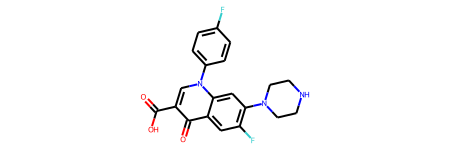

In [45]:
x2

# PUBCHEM library to downoad batch of chemical structures
https://pubchempy.readthedocs.io/en/latest/guide/gettingstarted.html

In [46]:
import pubchempy as pcp

In [47]:
results = pcp.get_compounds('ciprofloxacin', 'name')
print (results)


[Compound(2764)]


In [48]:
for compound in results:
    print (compound.isomeric_smiles)


C1CC1N2C=C(C(=O)C3=CC(=C(C=C32)N4CCNCC4)F)C(=O)O


In [49]:
pcp.get_cids('2-nonenal', 'name', 'substance', list_return='flat')

[17166, 5283335, 5354833]

In [50]:
Cipro_result = pcp.get_cids('ciprofloxacin', 'name', 'substance', list_return='flat')
Cipro_result

[2764, 62998, 62999, 4011971, 10336735, 11045861, 17906217, 24848022, 25218032]

In [51]:
for compound in Cipro_result:
    c = pcp.Compound.from_cid(compound)
    print (c.isomeric_smiles)
   

C1CC1N2C=C(C(=O)C3=CC(=C(C=C32)N4CCNCC4)F)C(=O)O
C1CC1N2C=C(C(=O)C3=CC(=C(C=C32)N4CCNCC4)F)C(=O)O.O.Cl
C1CC1N2C=C(C(=O)C3=CC(=C(C=C32)N4CCNCC4)F)C(=O)O.Cl
C1CC1N2C=C(C(=O)C3=CC(=C(C=C32)N4CC[NH2+]CC4)F)C(=O)[O-]
C1CC1N2C=C(C(=O)C3=CC(=C(C=C32)N4CCNCC4)[18F])C(=O)O
C1CC1N2CC(C(=O)C3=CC(=C(C=C32)N4CCNCC4)F)C(=O)O
C1CC1N2C=C(C(=O)C3=CC(=C(C=C32)N4CCNCC4)F)C(=O)O.C1CC1N2C=C(C(=O)C3=CC(=C(C=C32)N4CCNCC4)F)C(=O)O.O.Cl
C[C@@H]1CC2C3CCC4=CC(=O)C=C[C@]4([C@@]3([C@@H](C[C@@]2([C@@]1(C(=O)CO)O)C)O)F)C.C1CC1N2C=C(C(=O)C3=CC(=C(C=C32)N4CCNCC4)F)C(=O)O
[2H]C1(C(N(C(C(N1)([2H])[2H])([2H])[2H])C2=C(C=C3C(=C2)N(C=C(C3=O)C(=O)O)C4CC4)F)([2H])[2H])[2H]


In [52]:
for compound in Cipro_result:
    c = pcp.Compound.from_cid(compound)
    s = Chem.MolFromSmiles(c.isomeric_smiles)
    

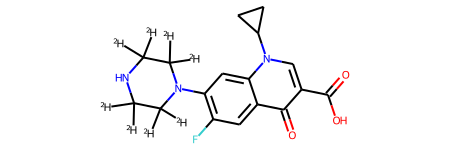

In [53]:
s

In [55]:
#for compound in Cipro_result:
   # c = pcp.Compound.from_cid(compound)
    #for s in c.isomeric_smiles:
        #Chem.MolFromSmiles(s)
 

In [ ]:
# Opening batch smile files
ciprofloxacin_compounds = Chem.SmilesMolSupplier ("ciprofloxacin_compound.smi", delimiter="\t", titleLine = False)

In [ ]:
ciprofloxacin_compounds

In [ ]:
#iterate in the list of ciprofloxacin_compounds and calculate the number of atoms in each compounds
[mol.GetNumAtoms() for mol in ciprofloxacin_compounds if mol is not None]

# Similiarity Searching: Ligand-based drug discovery 
### query molecule
### library
### molecular fingerprints
### pairwise similarity 

In [ ]:
query = Chem.SmilesMolSupplier ("ciprofloxacin.smi", delimiter="\t", titleLine = False)
lib = Chem.SmilesMolSupplier ("library.smi", delimiter="\t", titleLine = False)

In [ ]:
# create finger prints of the query molecule and append the in a list  
#what is the radius 2 in the morganfingerprint generator???? 
fp1 = []
for i, mol in enumerate (query):
    fp1.append(AllChem.GetMorganFingerprint(mol,2))

In [ ]:
fp1

In [ ]:
# TanimotoSimilarity = 1 is the exact match
for i, fp in enumerate (fp1):
    for j, fp3 in enumerate (fp2):
        print(DataStructs.TanimotoSimilarity(fp, fp3))

# Similarity searching with Obabel python package

In [ ]:
!obabel

In [ ]:
!obabel ciprofloxacin.smi library.smi -ofpt

# Substructure searching 
https://openbabel.org/docs/dev/Fingerprints/intro.html

In [ ]:
# query molecule used in earlier similarity searching 
Draw.MolsToGridImage(query)

In [ ]:
# library molecules used in earlier similarity searching 
Draw.MolsToGridImage(lib)

# Substructure searching with rdkit
https://github.com/suneelbvs/rdkit_tutorials

In [ ]:
patt = Chem.MolFromSmiles("C1CC1N2C=C(C(=O)C3=CC(=C(C=C32)N4CCNCC4)F)C(=O)O.Cl")
matches = []
suppl = Chem.SmilesMolSupplier('library.smi',delimiter='\t',titleLine=False)
for mol in suppl:
    if mol.HasSubstructMatch(patt):
        matches.append(mol)
len(matches)

In [ ]:
matches

# Similarity and Substructure Search Assignment

In [56]:
query = Chem.SmilesMolSupplier ("Tris4HydroxyphenylThiophene.smi", delimiter="\t", titleLine = False)
lib = Chem.SmilesMolSupplier ("estrogenbioactive_library.smi", titleLine = False)

In [57]:
# create finger prints of the query molecule and append the in a list  
#what is the radius 2 in the morganfingerprint generator???? 
fp1 = []
for i, mol in enumerate (query):
    fp1.append(AllChem.GetMorganFingerprint(mol,2))

In [58]:
fp1

In [60]:
# create finger prints of the library molecules and append the in a list  
#what is the radius 2 in the morganfingerprint generator???? check morganfingerprint lectures 
#fp2 = []
#for j, mol in enumerate (lib):
    #fp2.append(AllChem.GetMorganFingerprint(mol,2))

In [62]:
#fp2

In [ ]:
# TanimotoSimilarity = 1 is the exact match
for i, fp in enumerate (fp1):
    for j, fp3 in enumerate (fp2):
        print(DataStructs.TanimotoSimilarity(fp, fp3))

In [ ]:
#Similarity searching with obabel
!obabel Tris4HydroxyphenylThiophene.smi estrogenbioactive_library.smi -ofpt

# substructure search pending!!!

## physicochemical Molecular descriptors calculations with PaDELpy
e.g. molecular weight, logP, Num of HBonds etc. 

In [ ]:
!pip install padelpy

In [ ]:
from padelpy import from_smiles
descriptors = from_smiles("CC(=O)NC1=CC=C(C=C1)O")